In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

patient_data = pd.DataFrame()
patient_data = pd.read_csv('./No-show-Issue-Comma-300k 2.csv')

patient_data.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


While on [Kaggle](https://www.kaggle.com), I came across a patient appointment data set ([here]( (https://www.kaggle.com/joniarroba/noshowappointments)). It has over 300,000 patients as well as information about the appointment date and several binary health indicators about each patient. It posed a question, "Why do 30% of patients miss their appointments?"


And that was it. There was no additional context about where this data came from or if the health indicators were from the doctor's records or self reported. There was no description about even what country this data was from. Furthermore, there were clear typos in the column headings such as "Alcoolism" and "HiperTension" but nonetheless,I got curious about this dataset of over 300,000 people - why do **30%** of patients **miss** their appointments? 

I intended to find out. 

After all, missed doctor appointments are a huge deal in the US. It is estimated by Healthcare industry professionals that missed appointments cost the US over \$150 billion  per year or between \$100 and \$1000 per patient depending on location and specialty of the practice ([source 1](http://www.healthcarefinancenews.com/blog/insight-tackling-healthcares-costly-problem-missed-appointments), [source 2](https://www.everseat.com/blog/missed-appointments-affect-more-than-just-revenue/)). These estimates are in revenue and are not including the extra cost of staff trying to track down these patients for future appointments. 

Hospital systems recognize this huge attrition problem and are trying to get to the bottom of why patients are missing appointments. When asked, patients say that they simply forget that they had an appointment ([source 3](http://bmcfampract.biomedcentral.com/articles/10.1186/1471-2296-6-47)). Therefore, hospital systems are trying to address this forgetfulness problem using various automated reminder systems, including text message reminders, similar to the SMS reminders in our dataset. But do these reminders have an impact? 

I first wanted to know more about the dataset - Who are these patients? What are their median ages? Is their overall health representative of the United States or perhaps of a different country all together?

Secondly, I wanted to know more about these missed appointments - was there a certain day that had more missed appointments? Did age matter? What, if any, trends could I find relating to these missed appointments. 

Thirdly, what was the impact of these text message reminders? Unfortunately, we do not have any context regarding these text messages, such as what the text messages said or when they were sent in relation to a patient's appointment date. That being said, did simply receiving a text message affect the rate of showing up to an appointment?

So to summarize:

1. Who are the patients in this data set?
2. Does Days Of The Week, Age or Days Scheduled in Advance contribute to missing an appointment?
3. Did receiving a text message affect a patient's ability to show up?


# Who Are the Patients?

the average age is 37 years
the standard deviation is 22.809014151649986 years


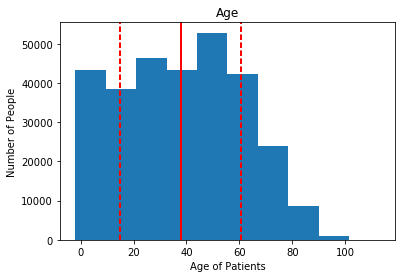

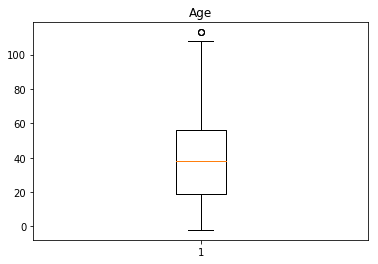

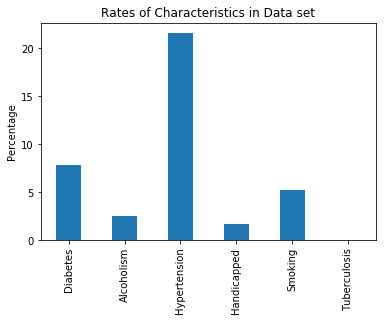

The rates of different health Characteristics:
7.796666666666667
2.501
21.589
1.6993333333333331
5.237
0.045


In [135]:
patient_age = patient_data['Age']
print("the average age is " + str(int(patient_age.mean()))+" years")
print("the standard deviation is "+ str(patient_age.std())+ " years")
plt.hist(patient_age)
plt.xlabel('Age of Patients')
plt.ylabel('Number of People')
plt.title('Age')
plt.axvline(patient_age.mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(patient_age.mean() + patient_age.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(patient_age.mean() - patient_age.std(), color='r', linestyle='dashed', linewidth=2)
plt.show()

plt.boxplot(patient_age)
plt.title('Age')
plt.show()


diabetic_patients = patient_data[patient_data['Diabetes']==1]
diabetes_rate_intermediate = diabetic_patients.count()/patient_data.count()*100
diabetes_rate = float(diabetes_rate_intermediate['Diabetes'])

alcoholic_patients = patient_data[patient_data['Alcoolism']==1]
alcoholic_rate_intermediate = alcoholic_patients.count()/patient_data.count()*100
alcoholic_rate = float(alcoholic_rate_intermediate['Alcoolism'])

hypertension_patients = patient_data[patient_data['HiperTension']==1]
hypertension_rate_intermediate = hypertension_patients.count()/patient_data.count()*100
hypertension_rate = float(hypertension_rate_intermediate['HiperTension'])

handicap_patients = patient_data[patient_data['Handcap']==1]
handicap_rate_intermediate = handicap_patients.count()/patient_data.count()*100
handicap_rate = float(handicap_rate_intermediate['Handcap'])

smoke_patients = patient_data[patient_data['Smokes']==1]
smoke_rate_intermediate = smoke_patients.count()/patient_data.count()*100
smoke_rate = float(smoke_rate_intermediate['Smokes'])

tuber_patients = patient_data[patient_data['Tuberculosis']==1]
tuber_rate_intermediate = tuber_patients.count()/patient_data.count()*100
tuber_rate = float(tuber_rate_intermediate['Tuberculosis'])

##maybe use count and then put on a bar chart of the different rates with a different rates of different countries
##using world bank data.....Might need beautiful soup but will come back to this because over the top touch
##https://www.indexmundi.com/facts/indicators/SH.STA.DIAB.ZS/rankings beautiful soup 
#there is a for loop here but not sure what items in line would be for items (just want column name) 

patient_rates = (diabete_test, alcoholism_test, hypertension_rate, handicap_rate, smoke_rate, tuber_rate)
bar_range = np.arange(6)

plt.bar(bar_range, patient_rates, 0.45)
plt.xticks(bar_range, ('Diabetes', 'Alcoholism', 'Hypertension','Handicapped', 'Smoking', 'Tuberculosis'), rotation= 'vertical')
plt.ylabel('Percentage')
plt.title('Rates of Characteristics in Data set')
plt.show()

print('The rates of different health Characteristics:')
for items in patient_rates: ##what is the way to get these to print the value.....its like print variable name namestr?
    print (items)



As shown in the histogram, the Median age for the data set is 37 years old with a standard deviation of 22.8 years. As noted in the following box plot, most of the patients fall within the Inter Quartile Range (IQR). The only outliers are the patients who lived over 105 which is consistent with the typical human being population dataset. 

Additionally, as noted in the bar graph, the population in the dataset had the following rates:
Diabetes: 7.79%
Alcoholics: 2.50%
Hypertension: 21.59%
Handicapped: 1.69%
Smoking: 5.24%
Tuberculosis: 0.05%

Based on these rates, the data set is most representative of WHAT COUNTRY? <<<---- is this even necessary?



# Trends on Missed Appointments


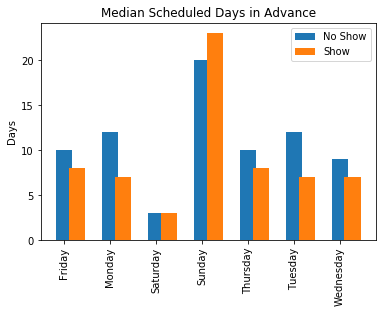

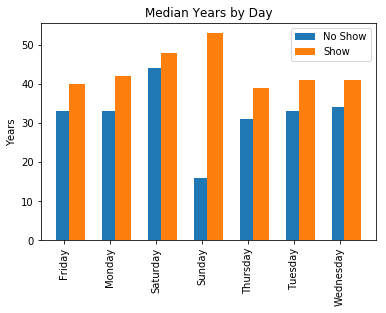

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
counts for each day
DayOfTheWeek
Friday       36525
Monday       40245
Saturday       880
Sunday           5
Thursday     42412
Tuesday      44626
Wednesday    44576
Name: Age, dtype: int64
 
DayOfTheWeek
Friday       16246
Monday       19053
Saturday       513
Sunday           1
Thursday     17850
Tuesday      18149
Wednesday    18919
Name: Age, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


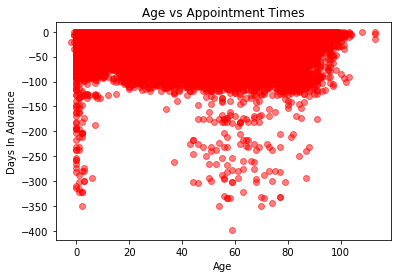

In [155]:
patient_no_show = patient_data[patient_data['Status']=="No-Show"]
patient_show = patient_data[patient_data['Status']=="Show-Up"]


day_split_show = patient_show.groupby('DayOfTheWeek').median()
day_split_no_show = patient_no_show.groupby('DayOfTheWeek').median()

day_bar = np.arange(7)
plt.bar(day_bar, day_split_no_show['AwaitingTime'].abs(), 0.35, label='No Show')
plt.bar(day_bar+0.28, day_split_show['AwaitingTime'].abs(),0.35, label = 'Show')
plt.xticks(day_bar,('Friday', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday'), rotation= 'vertical')
plt.ylabel('Days')
plt.title('Median Scheduled Days in Advance')
plt.legend()
plt.show()


day_bar = np.arange(7)
plt.bar(day_bar, day_split_no_show['Age'], 0.35, label='No Show')
plt.bar(day_bar+0.28, day_split_show['Age'],0.35, label = 'Show') ##prob need to do .sort
plt.xticks(day_bar,('Friday', 'Monday', 'Saturday','Sunday', 'Thursday', 'Tuesday', 'Wednesday'), rotation= 'vertical')
plt.ylabel('Years')
plt.title('Median Years by Day')
plt.legend()
plt.show()

## then when looking at sunday, we are seeing some extreme numbers. want to print number of people in Sunday ...show not valid
show_day_counts=patient_show.groupby('DayOfTheWeek').count()
no_show_day_counts=patient_no_show.groupby('DayOfTheWeek').count()

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("counts for each day")
print(show_day_counts['Age'])
print(" ")
print(no_show_day_counts['Age'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

##POTENTIAL BREAK HERE FOR DESCRIPTION OF ABOVE

##print(day_split_show) ## should probably figure out how to get days of the week in order? 
##print(day_split_no_show)

plt.scatter(x=patient_data['Age'], y=patient_data['AwaitingTime'], color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Days In Advance')
plt.title('Age vs Appointment Times')
plt.show()

The three variables I wanted to explore were Days Of The Week, Median Age of Patient and Days scheduled in Advance. 

As a result, in the first bar graph, I broke down the data by Days of the Week and then by days the appointment was made in advance. Across all the days, it was clear that irrespective of Day of the Week, those appointments made farther in advance, were more likely to end in a missed appointment.  

^^^^^^ how much detail am i supposed to be giving? Should I more integrating my writing with the graphs? 



In the first bar graph, it is clear that the appointments that were made farther in advance were typically missed more often, with the large difference between the weekdays (M-F) and the weekend (Sat, Sun)

In the second bar graph, it is clear that the older a patient is, the less likely they are to miss an appointment, with the largest difference between the Ages of the "Show" and "No-Show" population occuring on Sundays. 

But this difference in Age is greater than 20 years or one whole standard deviation of the actual population. As a result, I wanted to explore the data to make sure I was not using a skewed sample for my Sunday Group. As the next table of counts shows, there is a huge discrepancy in the number of patients in my sample for the Sunday group (5 for the Sunday Show and 1 for the Sunday No-Show), leading to a biased or skewed sample group for Sunday. Additionally, the Saturday 

This lends me to believe that the sampling doctor clinic must be closed on Sundays and potentially only open for a partial day on Saturday. As a reuslt, the Sunday and Saturday group should be ignored for future analysis as they are skewed.

Now as I saw a trend between the older patients showing up for more of their appointments as well as a trend for appointments made closer to the actual date, I wanted to see if there was any connection between Age and Appointment Times as noted in the scatter plot. 

The Scatter plot shows that regardless of Age, most appointments are scheduled within 100 days of the actual appointment. That being said, the scatter plot highlights two distinct groups that stray from this 100 day mark. One group are patients under the age of 5 and the other group are patients between the ages of 45 and 80 years old. 

In terms of future research, it would be important to dive deeper into these two different populations to see what if any factors drive them to deter away from the 100 day norm and if these factors contribute to their rate of showing up for an appointment. Additionally, when looking at the population under the Age of 5, it would be important to take into account any cultural norms regarding pre-natal health and parenting as the parents will largely influence when these appointments are made and if the patient shows up for them. 




# SMS Reminder Effects

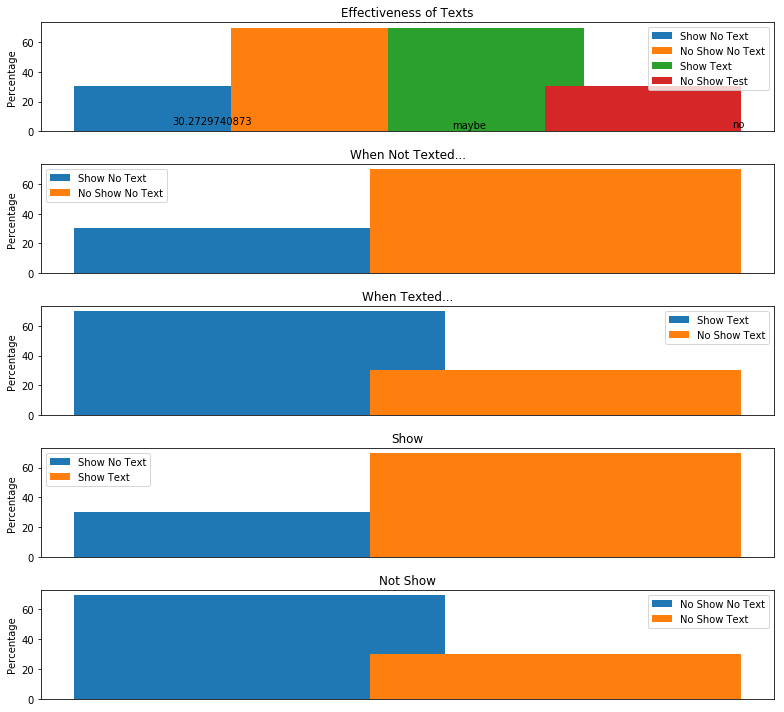

In [154]:
patient_no_text = patient_data[patient_data['Sms_Reminder']==0]
patient_text = patient_data[patient_data['Sms_Reminder']==1]
showed_patient_no_text = patient_no_text[patient_no_text['Status']=='No-Show']
showed_patient_no_text_rate= (showed_patient_no_text['Age'].count()/patient_no_text['Age'].count())*100

no_show_patient_no_text = patient_no_text[patient_no_text['Status']=='Show-Up']
no_show_patient_no_text_rate=(no_show_patient_no_text['Age'].count()/patient_no_text['Age'].count())*100


no_showed_patient_text = patient_text[patient_text['Status']=='No-Show']
no_showed_patient_text_rate=(no_showed_patient_text['Age'].count()/patient_text['Age'].count())*100

showed_patient_text = patient_text[patient_text['Status']=='Show-Up']
showed_patient_text_rate=(showed_patient_text['Age'].count()/patient_text['Age'].count())*100

##HOW CAN I HIDE THE X AXIS UNITS? 
plt.figure(figsize=(11,10))
plt.subplot(5,1,1)
plt.bar(1, showed_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.bar(1+(0.28*2), showed_patient_text_rate,0.35, label = 'Show Text')
plt.bar(1+(0.28*3), no_showed_patient_text_rate,0.35, label = 'No Show Text')
plt.text(1,2, showed_patient_no_text_rate)
plt.text(2,3, 'no')
plt.text(1.5,2, 'maybe')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('Effectiveness of Texts')
plt.legend()


plt.subplot(5,1,2)
plt.bar(1, showed_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('When Not Texted...')
plt.legend()

plt.subplot(5,1,3)
plt.bar(1, showed_patient_text_rate,0.35, label = 'Show Text')
plt.bar(1+0.28, no_showed_patient_text_rate,0.35, label = 'No Show Text')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('When Texted...')
plt.legend()

plt.subplot(5,1,4)
plt.bar(1, showed_patient_no_text_rate, 0.35, label='Show No Text')
plt.bar(1+0.28, showed_patient_text_rate,0.35, label = 'Show Text')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('Show')
plt.legend()

plt.subplot(5,1,5)
plt.bar(1, no_show_patient_no_text_rate,0.35, label = 'No Show No Text')
plt.bar(1+0.28, no_showed_patient_text_rate,0.35, label = 'No Show Text')
plt.xticks([])
plt.ylabel('Percentage')
plt.title('Not Show')
plt.legend()

plt.tight_layout()
plt.show()


# Conclusion

In Conclusion, the patients in the dataset were pretty typical of a general practice

In terms of what factors influence a patient showing up for an appointment, we were not able to analyze days of the week, specifically weekday vs weekend, as there was not a large enough sample for the Saturday and Sunday populations, relative to the weekday populations. That being said, generally, the older the patient and the lower the days in advance, the higher the chance of the patient showing up for an appointment. 

Regarding the effectiveness of text reminders,

In terms of next steps, 
